# car90 Data Assessment

## James CarMichael

### _Prompt_
> ##### Given the Consumer Reports “car90” 1990 data set, categorize each of the cars as green (a good purchase), yellow (a mediocre purchase), or red (a bad purchase) for an average American city-dweller (single with no kids, average height, income, etc.). The goal is to help consumers distill complex information and make a good decision.

### _What assumptions did I have to make?_
> #####  1.	The average net compensation for a single person in 1990 was approximately 20,172.11 (pre-tax) according to the Social Security Administration. We’ll assume this remains the same over the course of the loan, excluding taxes.  
> #####  2.  Our consumer does not want to spend more than 15 percent of his/her gross income on the car loan over the four-year period, would be subject to a 4% interest rate, and would not be putting anything down on the vechile.
> #####  3.  With these parameters, a loan amount of 12,103.27 serves as an example of a categorically “green” purchase.  The total cost of the car loan with interest would be 13,117 at a monthly payments of 273.  

> ##### 4. The buyer would be the average height of an adult male measuring at 5’ 9’’.  
> ##### 5. The buyer doesn’t have any children, so space in the back is not crucial. 
> ##### 6. The buyer lives or often drives in a metropolitan area, so size and maneuverability are valued over power. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import stats
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from statsmodels.api import OLS
import warnings
warnings.filterwarnings('ignore')

cars = pd.read_csv("car90.csv")
cars.head()


C:\Users\Carmijh0\Anoconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Unnamed: 0,Country,Disp,Disp2,Eng.Rev,Front.Hd,Frt.Leg.Room,Frt.Shld,Gear.Ratio,Gear2,...,Steering,Tank,Tires,Trans1,Trans2,Turning,Type,Weight,Wheel.base,Width
0,Acura Integra,Japan,112.0,1.8,2935.0,3.5,41.5,53.0,3.26,3.21,...,power,13.2,195/60,man.5,auto.4,37.0,Small,2700.0,102,67
1,Acura Legend,Japan,163.0,2.7,2505.0,2.0,41.5,55.5,2.95,3.02,...,power,18.0,205/60,man.5,auto.4,42.0,Medium,3265.0,109,69
2,Audi 100,Germany,141.0,2.3,2775.0,2.5,41.5,56.5,3.27,3.25,...,power,21.1,205/60,man.5,auto.3,39.0,Medium,2935.0,106,71
3,Audi 80,Germany,121.0,2.0,2835.0,4.0,42.0,52.5,3.25,3.25,...,power,15.9,175/70,man.5,auto.3,35.0,Compact,2670.0,100,67
4,BMW 325i,Germany,152.0,2.5,2625.0,2.0,42.0,52.0,3.02,2.99,...,power,16.4,195/65,man.5,auto.4,35.0,Compact,2895.0,101,65


In [2]:
#(111, 35)
#Clarifying the missing values for each column.  Noteworthy NA counts can be found in 
#Gear.Ratio, Mileage, Model2, Reliability, Sration.m, Trans1.
#Helpful column header descriptions can be found at https://stat.ethz.ch/R-manual/R-devel/library/rpart/html/car90.html.
cars.rename(columns = {"Unnamed: 0" : "Car"}, inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 35 columns):
Car             111 non-null object
Country         105 non-null object
Disp            108 non-null float64
Disp2           108 non-null float64
Eng.Rev         73 non-null float64
Front.Hd        111 non-null float64
Frt.Leg.Room    111 non-null float64
Frt.Shld        111 non-null float64
Gear.Ratio      73 non-null float64
Gear2           103 non-null float64
HP              108 non-null float64
HP.revs         108 non-null float64
Height          111 non-null float64
Length          111 non-null int64
Luggage         111 non-null int64
Mileage         53 non-null float64
Model2          21 non-null object
Price           105 non-null float64
Rear.Hd         111 non-null float64
Rear.Seating    111 non-null float64
RearShld        111 non-null float64
Reliability     76 non-null object
Rim             108 non-null object
Sratio.m        26 non-null float64
Sratio.p        104 no

In [3]:
#Further, what percentage of each category us missing?
#It looks like mileage, Sratio.m, Eng.Rev, Gear.Ratio, Trans1, and Reliability 
#may not prove to be the most helpful metrics.
percent = (cars.isnull().sum()/cars.isnull().count()).sort_values(ascending=False)
total = cars.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Model2,90,0.810811
Sratio.m,85,0.765766
Mileage,58,0.522523
Eng.Rev,38,0.342342
Gear.Ratio,38,0.342342
Trans1,38,0.342342
Reliability,35,0.315315
Gear2,8,0.072072
Trans2,8,0.072072
Sratio.p,7,0.063063


In [4]:
#Removing cars from the dataset in which we don't have a price for.  
#We can't reccomend them to the consumer with confidence since we don't have the product's price.
#These cars will have a price classification of 0 or 'red.'
#New shape (105, 35)
cars_1 = cars.drop(cars.index[[9, 14, 20, 34, 60, 86]])
#cars_1 is the original dataframe withouth the cars missing price values.  

In [5]:
#We now have a dataset with prices for all remaining vehciles for analysis/exploration. 
percent = (cars_1.isnull().sum()/cars_1.isnull().count()).sort_values(ascending=False)
total = cars_1.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Model2,85,0.809524
Sratio.m,79,0.752381
Mileage,52,0.495238
Trans1,32,0.304762
Eng.Rev,32,0.304762
Gear.Ratio,32,0.304762
Reliability,29,0.276190
Trans2,5,0.047619
Gear2,5,0.047619
Sratio.p,4,0.038095


In [6]:
#It will be useful to have a dataset without any NA values for analysis as well.  
cars_drop = cars_1.drop((missing_data[missing_data['Total'] > 1]).index,1)
cars_drop.isnull().sum().max()

0

In [7]:
cars_drop #After dropping NA's, it's important to note we only have 25 fully populated
#variables for all 105 cars.  
#cars_drop is a dataframe including complete obersvations (25 without NA's) for every car.  

,Car,Country,Disp,Disp2,Front.Hd,Frt.Leg.Room,Frt.Shld,HP,HP.revs,Height,...,RearShld,Rim,Steering,Tank,Tires,Turning,Type,Weight,Wheel.base,Width
0,Acura Integra,Japan,112.0,1.8,3.5,41.5,53.0,130.0,6000.0,47.5,...,52.0,R14,power,13.2,195/60,37.0,Small,2700.0,102,67
1,Acura Legend,Japan,163.0,2.7,2.0,41.5,55.5,160.0,5900.0,50.0,...,55.5,R15,power,18.0,205/60,42.0,Medium,3265.0,109,69
2,Audi 100,Germany,141.0,2.3,2.5,41.5,56.5,130.0,5500.0,51.5,...,55.0,R15,power,21.1,205/60,39.0,Medium,2935.0,106,71
3,Audi 80,Germany,121.0,2.0,4.0,42.0,52.5,108.0,5300.0,50.5,...,52.0,R14,power,15.9,175/70,35.0,Compact,2670.0,100,67
4,BMW 325i,Germany,152.0,2.5,2.0,42.0,52.0,168.0,5800.0,49.5,...,51.5,R14,power,16.4,195/65,35.0,Compact,2895.0,101,65
5,BMW 535i,Germany,209.0,3.5,3.0,42.0,54.5,208.0,5700.0,51.0,...,55.5,R15,power,21.1,225/60,39.0,Medium,3640.0,109,69
6,Buick Century,USA,151.0,2.5,4.0,42.0,56.5,110.0,5200.0,49.5,...,56.0,R14,power,15.7,185/75,41.0,Medium,2880.0,105,69
7,Buick Electra,USA,231.0,3.8,6.0,42.0,58.5,165.0,4800.0,50.5,...,58.5,R14,power,18.0,205/75,43.0,Large,3350.0,111,72
8,Buick Le Sabre,USA,231.0,3.8,5.0,41.0,59.0,165.0,4800.0,51.0,...,58.5,R14,power,18.0,205/75,42.0,Large,3325.0,111,72
10,Buick Riviera,USA,231.0,3.8,3.5,41.5,58.0,165.0,4800.0,48.5,...,56.5,R15,power,18.8,205/70,41.0,Medium,3465.0,108,73


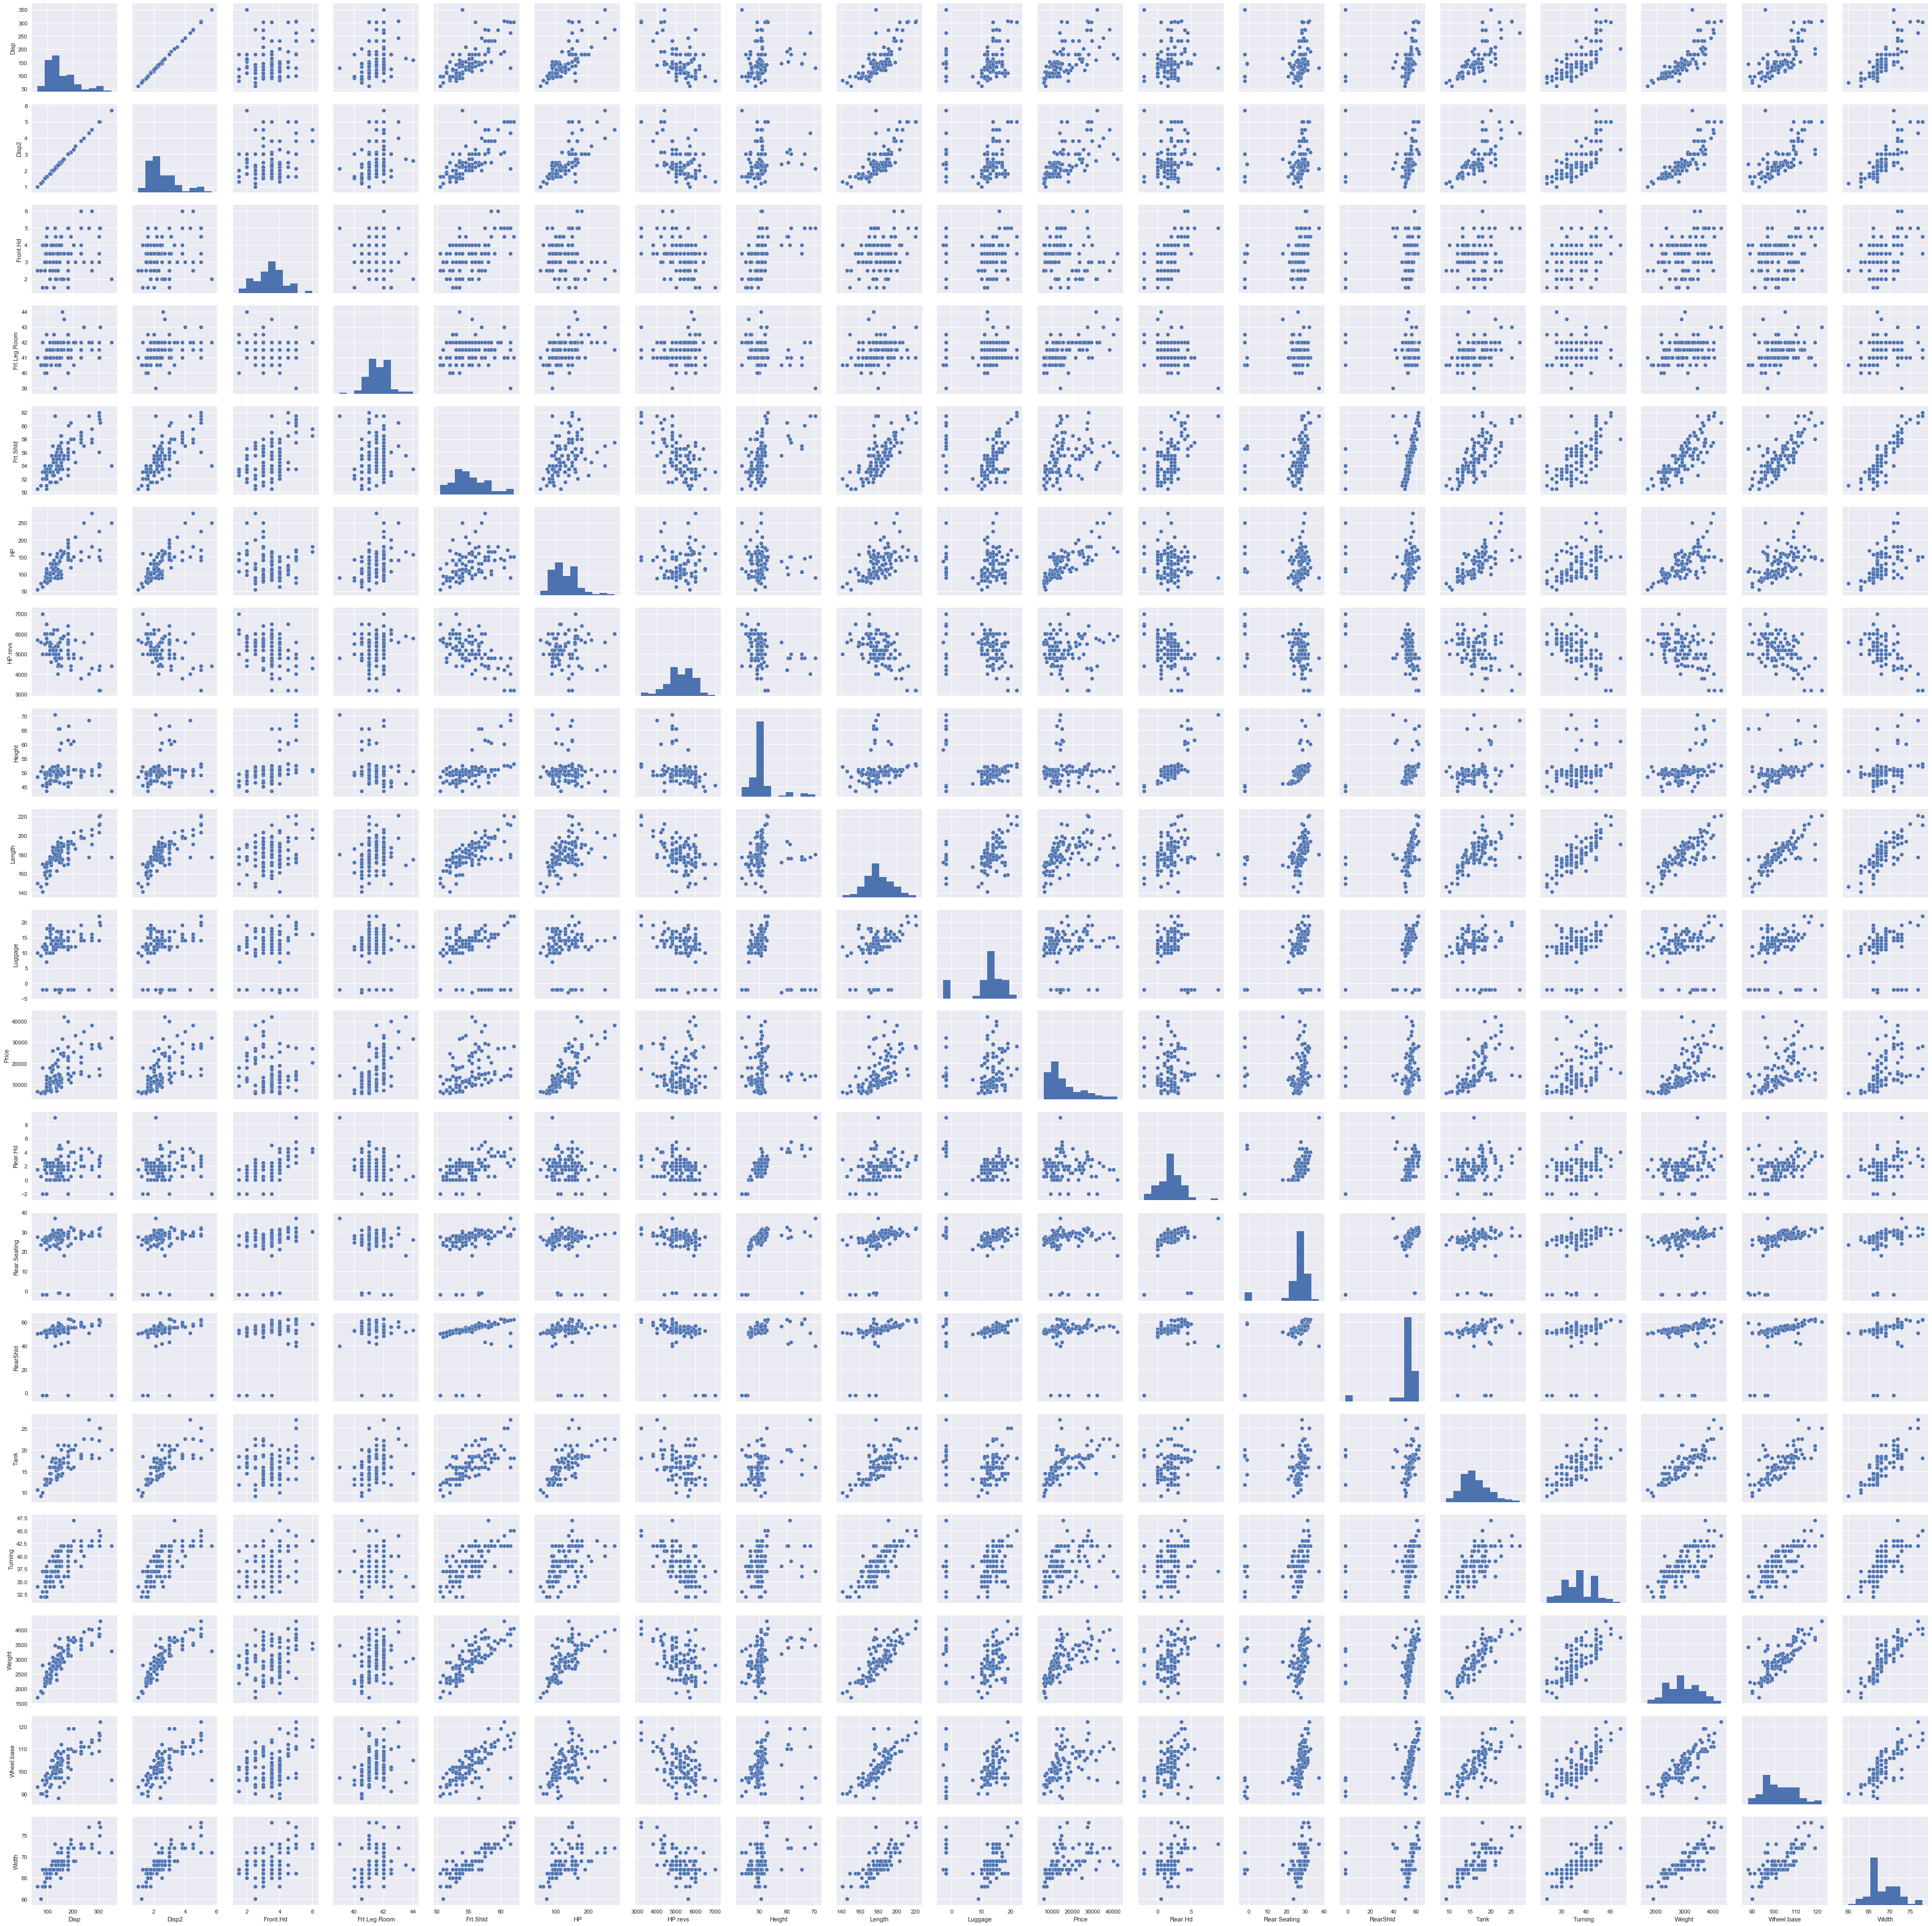

In [8]:
#Data Exploration
#Using the car_drop (no NA's) to explore any possible correlations that might be insightful amongst the 12
#variables. Helpful to click on plotst to zoom.   
g = sns.pairplot(cars_drop) 

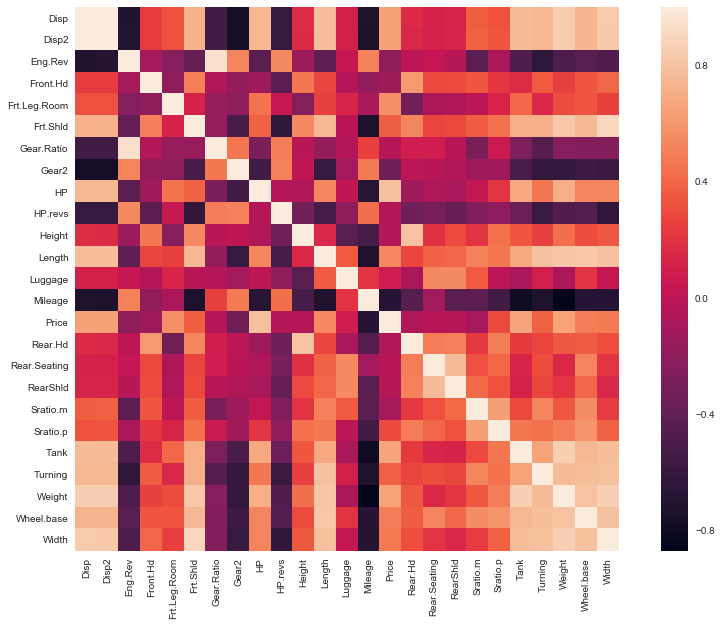

In [9]:
#Heatmap of the entrire dataset.
#Price seems to have postive correlation with Disp, Disp2, Front Leg room, 
#Front shoulder room, length, width, and tank.
cars_heat = cars_1.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cars_heat, vmax=1.0, square=True);

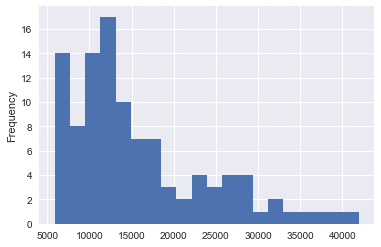

In [10]:
#What range of prices are we looking at as a consumer?
pd.concat([cars_1['Price']]).plot.hist(20)

In [11]:
#Initial individual variable exploration within both performance and comfort peramieters as they 
#compare to price.  
def exploration_plot (x):
    var = x
    data = pd.concat([cars_1['Price'], cars_1[var]], axis=1)
    data.plot.scatter(x=var, y='Price', ylim=(0,40000))

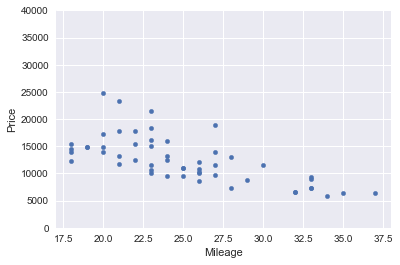

In [12]:
#Performace vs Price
#Noticeablly, light negative linear correlation
exploration_plot('Mileage')

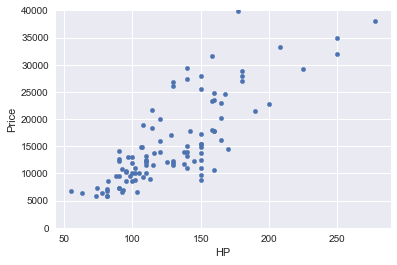

In [13]:
#As to be expected, horsepower is positively correlated with price.  
exploration_plot('HP') 

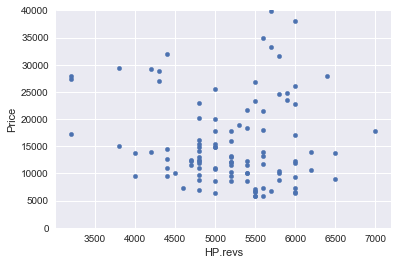

In [14]:
 #Max safe engine speed aka the 'red line.'  Little to no correlation.
exploration_plot('HP.revs')

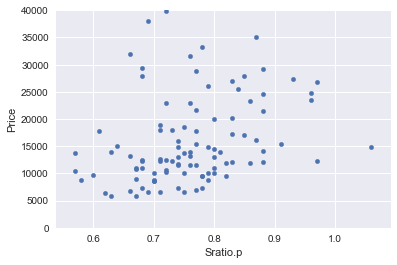

In [15]:
#power sterring - number of turns of the steering wheel 
#needed for a turn of 30ft radius.  This may be useful to help illustrate maneuverability.  
exploration_plot('Sratio.p') 

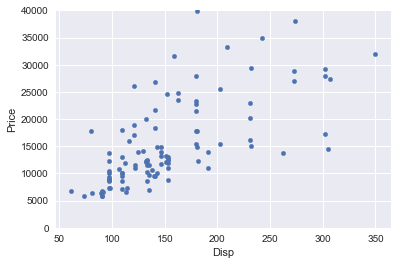

In [16]:
#Relatively linear, positive correlation. Representing engine displacement as a total volume of 
#pistons within the cylinders.
#Positive correlation
exploration_plot('Disp') 

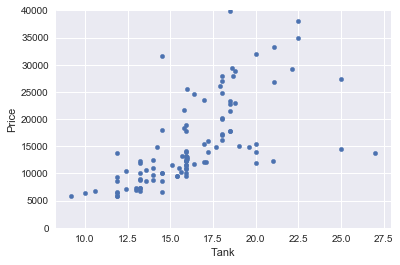

In [17]:
 #Price is positively correlated with price.
exploration_plot('Tank')  

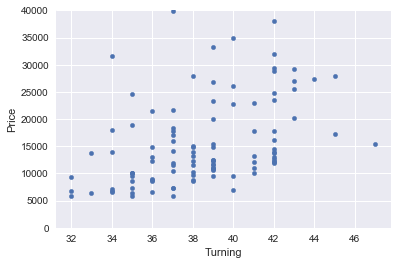

In [18]:
#Turning radius
exploration_plot('Turning')

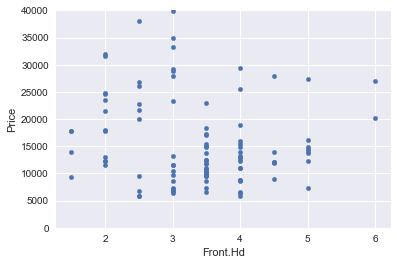

In [19]:
#Internal space vs Price
#Frontal distance beween headliner and head of a 5' 9'' man
exploration_plot('Front.Hd') 

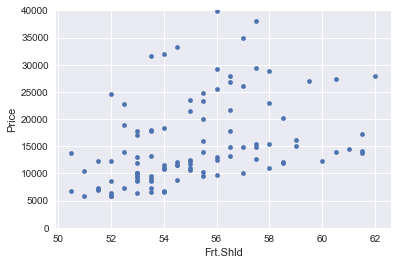

In [20]:
#Room beween shoulder and car door.
exploration_plot('Frt.Shld') 

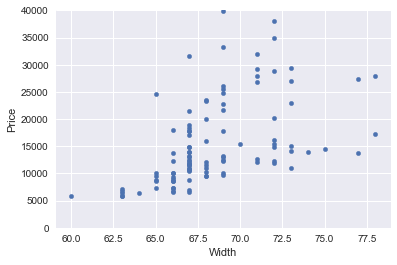

In [21]:
#Width
#The largest width still fits within an average, compact parking space in most cities, so this will probably
#not be a very helpful determination. 
exploration_plot('Width')

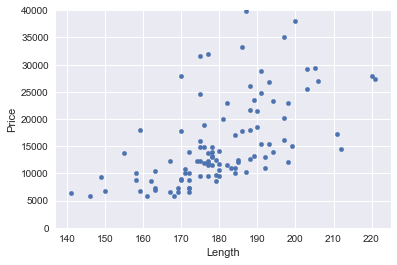

In [22]:
#Length
#Length will be a more useful metric for accessing public parking spaces in a city than width. 
exploration_plot('Length')

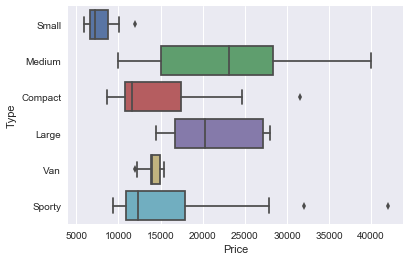

In [23]:
#Exploration of exisiting categories, like type and reliability, listed in the dataset
#may provide insight into key relationships. 
#Smaller, compact cars tend to be less less expensive which makes sense.   
sns.boxplot(data = cars_1, x = "Price", y = "Type") 

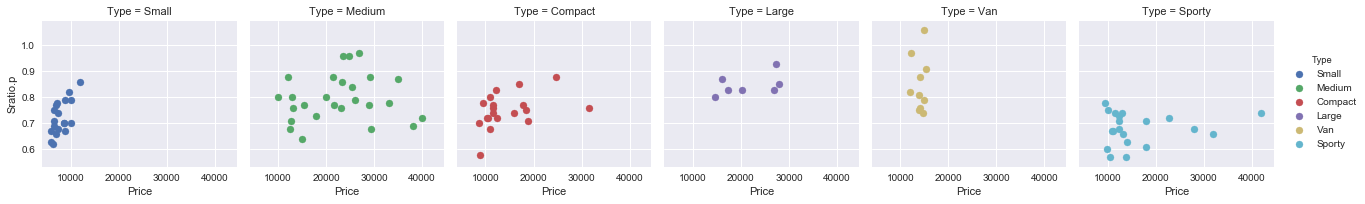

In [24]:
facet = sns.FacetGrid(data = cars_1, col = "Type", hue = "Type")  
facet = facet.map(plt.scatter, "Price", "Sratio.p")
facet.add_legend();

In [25]:
#Spatial, multivarient linear regression in relation to price
X = cars_drop.filter(['Tank', 'Length', 'Width'], axis=1)
y = cars_1['Price']
model = OLS(y, X)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           7.05e-48
Time:                        15:04:07   Log-Likelihood:                -1062.9
No. Observations:                 105   AIC:                             2132.
Df Residuals:                     102   BIC:                             2140.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tank        1668.0516    239.372      6.968      0.0

In [26]:
#Performace, multivarient linear regression in relation to price
X = cars_drop.filter(['HP', 'Disp2'], axis=1)
y = cars_1['Price']
model = OLS(y, X)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     531.8
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           5.18e-55
Time:                        15:04:07   Log-Likelihood:                -1049.3
No. Observations:                 105   AIC:                             2103.
Df Residuals:                     103   BIC:                             2108.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HP           107.1422     16.089      6.659      0.0

In [52]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "presentation.png", width=800)

In [28]:
#Creating a normalized columns for creation of performance and size categories. 
cars_norm = cars.copy()
cols_to_norm = ['HP','Disp2','Length','Tank']
cars_norm[cols_to_norm] = cars_norm[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
cars_norm['Performance_Norm'] = cars_norm.iloc[:,[3, 10]].sum(axis=1)
cars_norm['Size_Norm'] = cars_norm.iloc[:,[13, 26]].sum(axis=1)

def set_price_category(c):
    if c['Price'] == 0:
        return 0
    elif c['Price'] <= 12100:
        return 2
    elif ((c['Price'] > 12100) & (c['Price'] < 16137)):
        return 1
    else:
        return 0

cars_norm['Class_Price'] = cars_norm.apply(set_price_category, axis=1)
cars_norm.Class_Price.value_counts()
#cars_norms['Class_Price']

2    42
0    42
1    27
Name: Class_Price, dtype: int64

In [29]:
cars_norm['Performance_Norm'].describe()

count    111.000000
mean       0.651789
std        0.374634
min        0.000000
25%        0.389371
50%        0.549089
75%        0.851541
max        1.874439
Name: Performance_Norm, dtype: float64

In [30]:
def set_performance_category(c):
    if c['Performance_Norm'] == 0:
        return 0
    elif c['Performance_Norm'] <= 0.39:
        return 2
    elif ((c['Performance_Norm'] > 0.39) & (c['Performance_Norm'] < 0.54)):
        return 1
    else:
        return 0
    
cars_norm['Class_Performance'] = cars_norm.apply(set_performance_category, axis=1)
cars_norm.Class_Performance.value_counts()
#cars_norm['Class_Price']

0    65
2    24
1    22
Name: Class_Performance, dtype: int64

In [31]:
cars_norm['Size_Norm'].describe()

count    111.000000
mean       0.881979
std        0.336121
min        0.044944
25%        0.665941
50%        0.882022
75%        1.088062
max        1.887640
Name: Size_Norm, dtype: float64

In [32]:
def set_size_category(c):
    if c['Size_Norm'] == 0:
        return 0
    elif c['Size_Norm'] <= 0.66:
        return 2
    elif ((c['Size_Norm'] > 0.66) & (c['Size_Norm'] < 0.88)):
        return 1
    else:
        return 0

cars_norm['Class_Size'] = cars_norm.apply(set_size_category, axis=1)
cars_norm.Class_Size.value_counts()

0    56
2    28
1    27
Name: Class_Size, dtype: int64

In [33]:
cars_norm['Classification_Score'] = cars_norm.iloc[:,[-3,-2,-1]].sum(axis=1)

def set_class_category(c):
    if c['Classification_Score'] == 0:
        return 'Red'
    elif c['Classification_Score'] >= 5:
        return 'Green'
    elif ((c['Classification_Score'] > 1) & (c['Classification_Score'] < 5)):
        return 'Yellow'
    else:
        return 'Red'

cars_norm['Classification_Color'] = cars_norm.apply(set_class_category, axis=1)
cars_norm.Classification_Color.value_counts()

Red       48
Yellow    38
Green     25
Name: Classification_Color, dtype: int64

In [34]:
#cars_norm.to_csv("Cars_multi_variable_classification_1.csv")
cars_norm.iloc[:,[0, -5, -4, -3, -2, -1]].head(20)

,Car,Class_Price,Class_Performance,Class_Size,Classification_Score,Classification_Color
0,Acura Integra,2,1,1,4,Yellow
1,Acura Legend,0,0,0,0,Red
2,Audi 100,0,0,0,0,Red
3,Audi 80,0,1,1,2,Yellow
4,BMW 325i,0,0,1,1,Red
5,BMW 535i,0,0,0,0,Red
6,Buick Century,1,0,0,1,Red
7,Buick Electra,0,0,0,0,Red
8,Buick Le Sabre,0,0,0,0,Red
9,Buick Regal,0,0,0,0,Red


In [54]:
cars_norm.iloc[:,[0, -5, -4, -3, -2, -1]].tail(20)

,Car,Class_Price,Class_Performance,Class_Size,Classification_Score,Classification_Color
91,Saab 9000,0,0,0,0,Red
92,Sterling 827,0,0,0,0,Red
93,Subaru Justy,2,2,2,6,Green
94,Subaru Legacy,2,0,1,3,Yellow
95,Subaru Loyale,2,2,1,5,Green
96,Subaru XT,1,2,1,4,Yellow
97,Toyota Camry,2,1,0,3,Yellow
98,Toyota Celica,1,0,1,2,Yellow
99,Toyota Corolla,2,2,2,6,Green
100,Toyota Cressida,0,0,0,0,Red


In [50]:
Image(url= "Presentation_2.png", width=600)

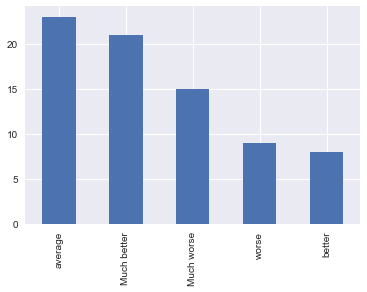

In [36]:
#Exploring reliability
#What metric are the values in the reliablity column being created from?
cars_1['Reliability'].value_counts().plot.bar()

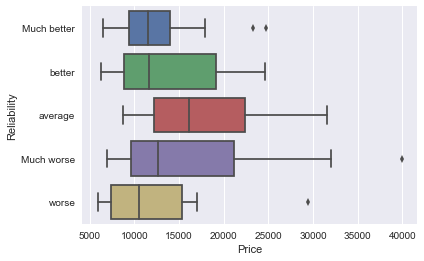

In [37]:
#Interestingly, cars in the much better reliability category are at the lower range of price specterm.  
sns.boxplot(data = cars_1, x = "Price", y = "Reliability")

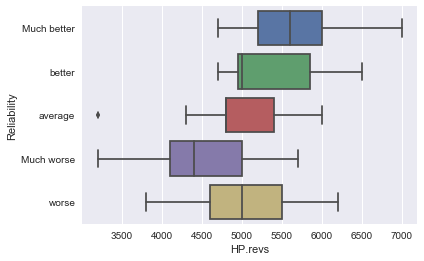

In [38]:
#Can I find a metric that helps to linearly illustrate the reliablity classification in the dataset? 
#Hp.revs appears to be directly correlated  with reliability.
sns.boxplot(data = cars_1, x = "HP.revs", y = "Reliability")

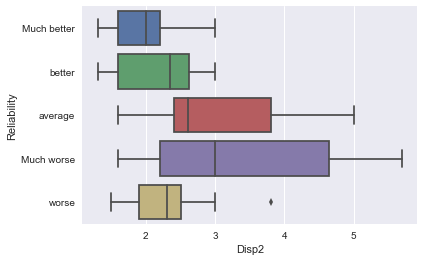

In [39]:
sns.boxplot(data = cars_1, x = "Disp2", y = "Reliability")

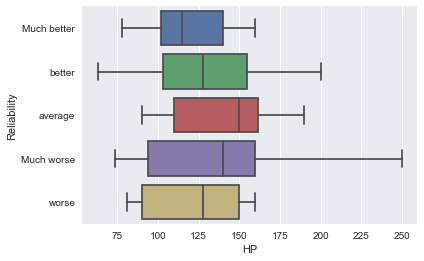

In [40]:
#Horsepower does not not display the same correlation amongst the reliability categories.  
sns.boxplot(data = cars_1, x = "HP", y = "Reliability")

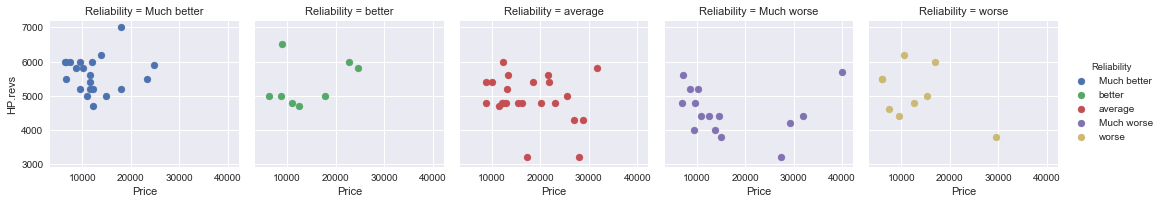

In [41]:
facet = sns.FacetGrid(data = cars_1, col = "Reliability", hue = "Reliability")
facet = facet.map(plt.scatter, "Price", "HP.revs")
facet.add_legend();

In [42]:
#Separating cars dataframe by presence of reliability.   
cars_reli = cars[cars['Reliability'].notnull()]
cars_noreli = cars[cars['Reliability'].isnull()]
#cars_reli.Reliability.isnull().value_counts()
#cars_reli
#cars_noreli

In [43]:
cars_drop.columns

Index(['Car', 'Country', 'Disp', 'Disp2', 'Front.Hd', 'Frt.Leg.Room',
       'Frt.Shld', 'HP', 'HP.revs', 'Height', 'Length', 'Luggage', 'Price',
       'Rear.Hd', 'Rear.Seating', 'RearShld', 'Rim', 'Steering', 'Tank',
       'Tires', 'Turning', 'Type', 'Weight', 'Wheel.base', 'Width'],
      dtype='object')

In [44]:
#Random Forest classification using Reliability - Preprocess
#Using all the variable columns without any NA's.  
cars_clf = cars_reli.filter(['Disp2', 'Disp', 'HP.revs', 'Height', 'Luggage', 'Turning', 'HP', 'Price',
                             'Tank', 'Weight', 'Length', 'Wheel.base', 'Reliability'], axis=1)
np.random.seed(0)
#cars_clf 76 rows
#Creating train and test dataframes.  
cars_clf['Train'] = np.random.uniform(0, 1, len(cars_clf)) <= .75
train, test = cars_clf[cars_clf['Train']==True], cars_clf[cars_clf['Train']==False]
#print('Number of observations in train df:', len(train))
#print('Number of observations in the test df:',len(test))
#Creating a features list of variables we'd like to explore. 
features = cars_clf.columns[:9]
y = pd.factorize(train['Reliability'])[0]
#Train the classifer
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
#Random Forest Application
clf.predict(test[features])

array([2, 2, 2, 2, 0, 1, 0, 2, 2, 4, 0, 4, 0, 2, 3, 0, 2, 2], dtype=int64)

In [46]:
clf.predict_proba(test[features])[0:10]

array([[0. , 0. , 0.7, 0.2, 0.1],
       [0.1, 0. , 0.8, 0.1, 0. ],
       [0.2, 0. , 0.4, 0.4, 0. ],
       [0. , 0. , 0.5, 0.4, 0.1],
       [0.5, 0. , 0.4, 0.1, 0. ],
       [0.2, 0.3, 0.3, 0.1, 0.1],
       [0.6, 0. , 0.1, 0.2, 0.1],
       [0.1, 0.1, 0.4, 0.3, 0.1],
       [0.2, 0.1, 0.5, 0.2, 0. ],
       [0. , 0. , 0.1, 0.4, 0.5]])

In [47]:
prediction = cars_clf.Reliability[clf.predict(test[features])]
prediction

2            NaN
2            NaN
2            NaN
2            NaN
0    Much better
1    Much better
0    Much better
2            NaN
2            NaN
4         better
0    Much better
4         better
0    Much better
2            NaN
3            NaN
0    Much better
2            NaN
2            NaN
Name: Reliability, dtype: object

In [48]:
test['Reliability'].head(15)

11     Much worse
12        average
15     Much worse
18     Much worse
25         better
26          worse
27        average
29     Much worse
30        average
32     Much worse
37        average
41     Much worse
50    Much better
69     Much worse
95    Much better
Name: Reliability, dtype: object

In [49]:
#Classifer unable to distinguish importance of variables within categorization of reliability.  
list(zip(train[features], clf.feature_importances_))

[('Disp2', 0.09369520876860235),
 ('Disp', 0.12063052205893918),
 ('HP.revs', 0.09358694793555569),
 ('Height', 0.14924824437711792),
 ('Luggage', 0.14577926048820958),
 ('Turning', 0.05474291326443501),
 ('HP', 0.09842251506781778),
 ('Price', 0.1326022020597615),
 ('Tank', 0.11129218597956092)]